# Milestone 2

---

# i. Introduction

## 1. Author

Name : Niko Amrullah Hakam

Batch : FTDS - RMT - 038

## 2. Overview of Dataset

This dataset contains games within their first 10 minutes. There are almost 10,000 datapoints in the df, and are all from high ELO games (Diamond 1 to Master)

1. Warding totem: a consumable item that a player can put on the map to reveal the nearby area temporarily

2. Minions: NPC that belong to both teams. They generate golds, an ingame currency, to buy items.

3. Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.

4. Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.

5. Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder 6. Dragon) offers a huge advantage to the team.

6. Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.

7. Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.

8. Level: Champion level. Start at 1. Max is 18. However over the course of 10 minutes, it should be half or even lower.

Each `gameId` is unique and can be used to further access more informations about the game or specific player id.

Version of game :

All datapoints are from the season 10 patch 10.7/8

>
Data collection method used by the creator of the dataset can be viewed from :

https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/discussion/148164?sort=recent-comments

## 3. Objectives

### a. Problem Statement

URL Dataset : https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/data

Problem :

League of Legends is one of, if not the most popular Multiplayer Online Battle Arena (MOBA) games where two teams (blue and red) each are pit against each other. Each team with 5 players. Though people usually play to have fun, some people play for competitive reasons. 

Global e-sport audience has been gaining traction steadily over the years, and tractions usually invite sponsors, and sponsors bring money. It is enough reason for anyone to want to play professionally.

Identifying what variables contribute to winning a game is crucial. Predicting a game result can also be important to evaluate players performance in non-ranked games. Suffice to say, this model might help :

- An e-sport talent management for LoL can better focus on what training regiments are needed for their talents. Post game analysis can help identify the key factors leading to a win or loss;
- Broadcasters and analysts can use predictions and insight to make live streams morea engaging by highlighting most impactful moments;
- Quality Assurance departments to buffs or nerfs some champs, adding new features in the map, or even as drastic as changing the layout of the arena;
- Anyone who wants to git gud.

Justificationg :
- https://www.linkedin.com/pulse/future-esports-gaming-industry-santosh-g-c2edc/
- https://businessalabama.com/esports-gaining-traction-on-alabama-junior-college-campuses/
- https://medium.com/@grantdowns/the-science-behind-winning-a-game-of-league-of-legends-6c22e3a828a9

User : E-sport talent management for LoL, QA departments, anyone.

https://mobalytics.gg/lol 

### b. Measurables and plotting

Supervised Learning, Classification.

Likely Logistic Regression.

Other models to try :

- KNN
- SVM
- Decision Tree
- Random Forest
- Boosting

There will be:
- Classification Report
- Confusion Matrix
- ROC_AUC

# ii. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize

from sklearn.metrics import roc_curve, auc

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [2]:
# Load the dataset
df_ori = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df = df_ori

In [4]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
df.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


# iv. EDA (Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [7]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

There seems to be no null values.

In [8]:
# describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gameId,9879.0,4.500084e+09,2.757328e+07,4.295358e+09,4.483301e+09,4.510920e+09,4.521733e+09,4.527991e+09
blueWins,9879.0,4.990384e-01,5.000244e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blueWardsPlaced,9879.0,2.228829e+01,1.801918e+01,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,2.500000e+02
blueWardsDestroyed,9879.0,2.824881e+00,2.174998e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
blueFirstBlood,9879.0,5.048082e-01,5.000022e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blueKills,9879.0,6.183925e+00,3.011028e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueDeaths,9879.0,6.137666e+00,2.933818e+00,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01
blueAssists,9879.0,6.645106e+00,4.064520e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01
blueEliteMonsters,9879.0,5.499544e-01,6.255265e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
blueDragons,9879.0,3.619800e-01,4.805974e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


The mean of blueWins is close to 0.5, likely a balanced distribution of outcomes of matches.

High values in `blueWardsPlaced` (up to 250) or `redGoldDiff` (up to 10,830) could mean the presence of outliers.



## 1. Value counts of features and the target.

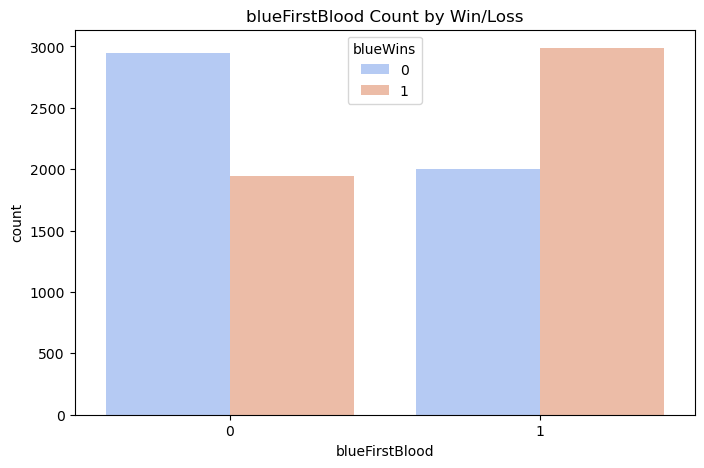

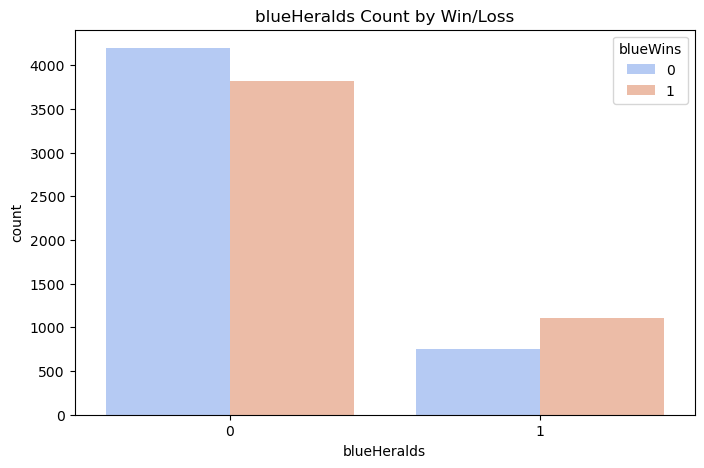

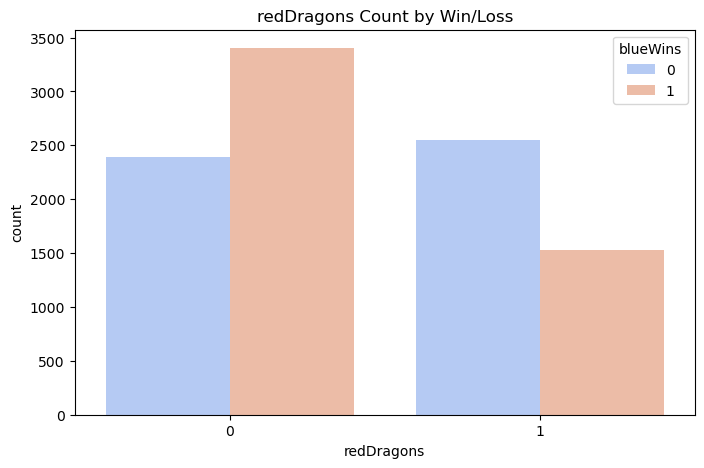

In [9]:
categorical_features = ['blueFirstBlood', 'blueHeralds', 'redDragons']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue='blueWins', palette='coolwarm')
    plt.title(f"{feature} Count by Win/Loss")
    plt.show()


FirstBlood appears to be an important feature correlated with the match outcome. Securing the first kill gives an early game advantage that likely contributes to winning.

Capturing Heralds provides an in-game strategic advantage that correlates with winning. However, not capturing the Herald does not necessarily ensure a loss, as wins are still observed when blueHeralds = 0

Dragons are key objectives that provide a significant advantage to the team that captures them.
If the red team captures dragons, the blue team’s likelihood of losing increases

## 2. Gold Diff vs Kills

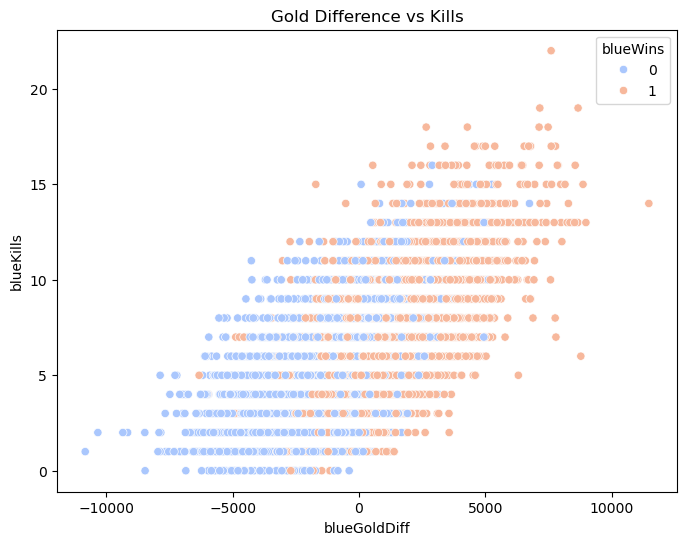

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='blueGoldDiff', y='blueKills', hue='blueWins', palette='coolwarm')
plt.title("Gold Difference vs Kills")
plt.show()

As gold difference (`blueGoldDiff`) increases, the number of kills (`blueKills`) also increases. This means that more kills comes with the advantage of more gold.

## 3. Ratios

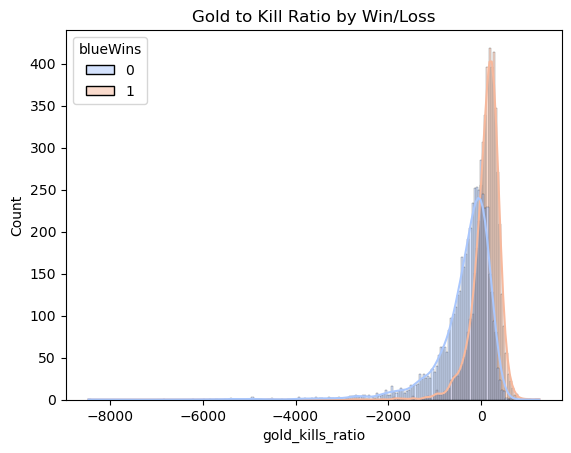

In [11]:
df_viz = df_ori.copy()

df_viz['gold_kills_ratio'] = df_viz['blueGoldDiff'] / (df_viz['blueKills'] + 1)
df_viz['ward_control'] = df_viz['blueWardsPlaced'] - df_viz['redWardsPlaced']

# Analyze new features
sns.histplot(data=df_viz, x='gold_kills_ratio', hue='blueWins', kde=True, palette='coolwarm')
plt.title("Gold to Kill Ratio by Win/Loss")
plt.show()

In [12]:
goldkill_rat = pd.DataFrame(df_viz, columns=['blueWins', 'gold_kills_ratio', 'ward_control'])
goldkill_rat

,blueWins,gold_kills_ratio,ward_control
0,0,64.300000,13
1,0,-484.666667,0
2,0,-146.500000,0
3,0,-264.200000,28
4,0,-143.428571,58
...,...,...,...
9874,1,314.875000,-29
9875,1,111.714286,42
9876,0,-345.142857,9
9877,0,-279.666667,-52


A high positive ratio correlates with higher chances of winning.

A large negative ratio is a strong indicator of losing.

Teams that can efficiently convert gold advantage into kills tend to win more frequently.

If the ratio is dropping early in the game, it might signal a need for strategic changes (e.g., avoiding unnecessary fights, focusing on gold-generating objectives like towers or jungle camps).

## 4. Features distribution

<Figure size 1600x1200 with 0 Axes>

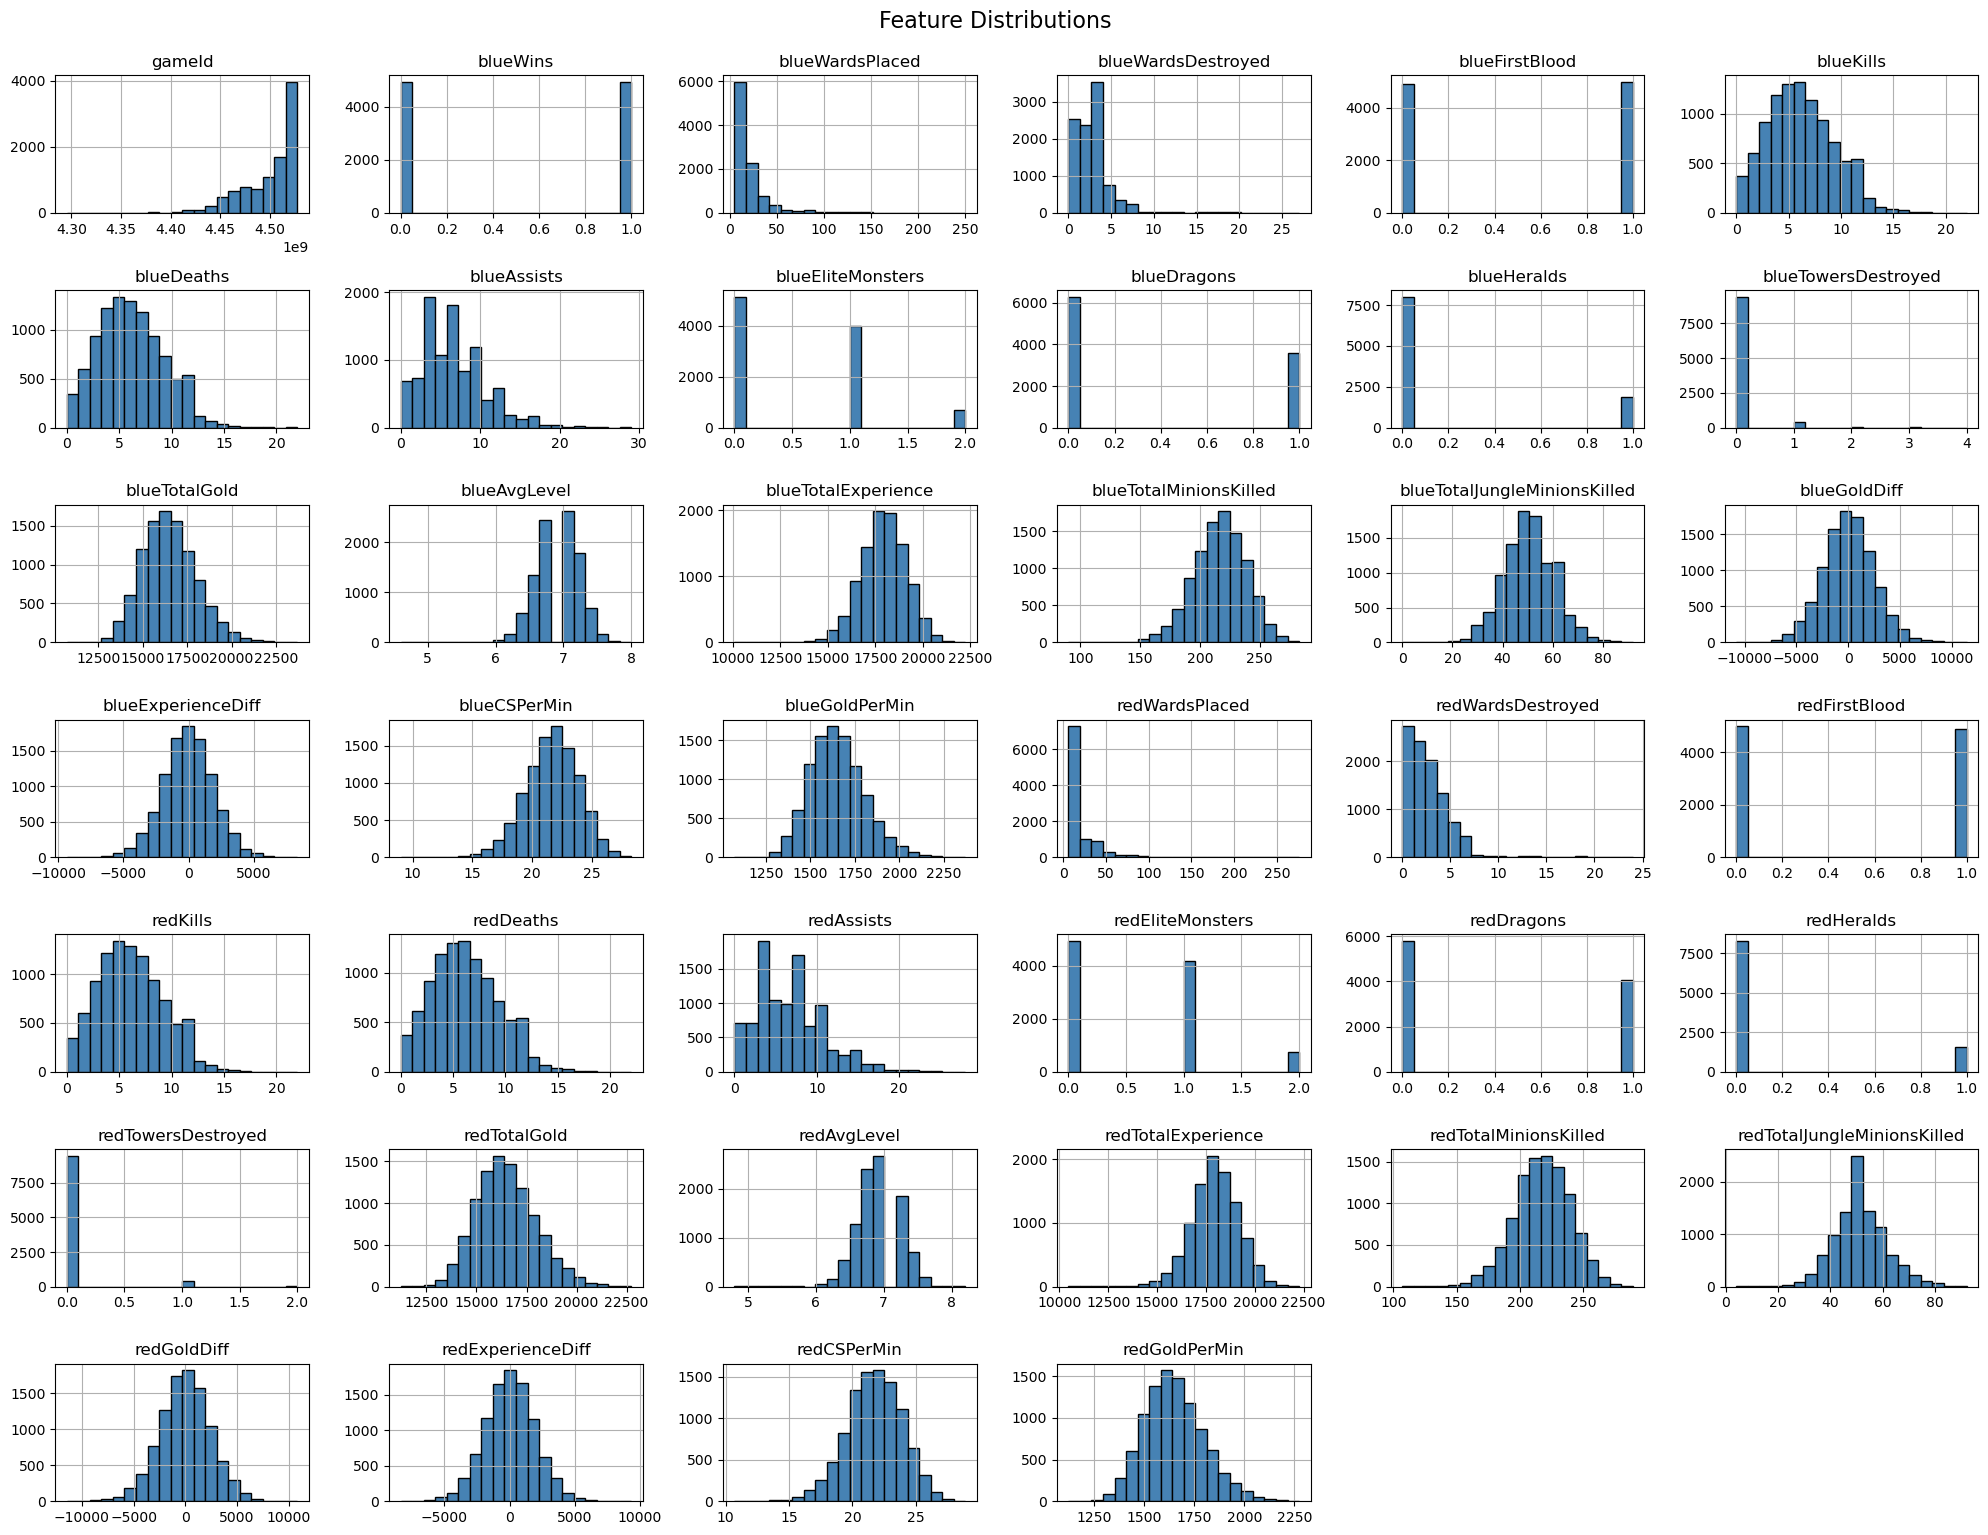

In [13]:
# histograms for Feature Distributions
plt.figure(figsize=(16, 12))
df.hist(bins=20, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
plt.show()

Some features like `blueWardsPlaced` and `redGoldDiff` may have som extreme values.

`blueKills` and `blueTotalGold` show varied distributions.

It's very rare for any of both teams to lose tower within 10 minutes of the game in any of the games recorded in this dataset.

In [14]:
df['blueWins'].value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

## 5. Heatmap feature corr.

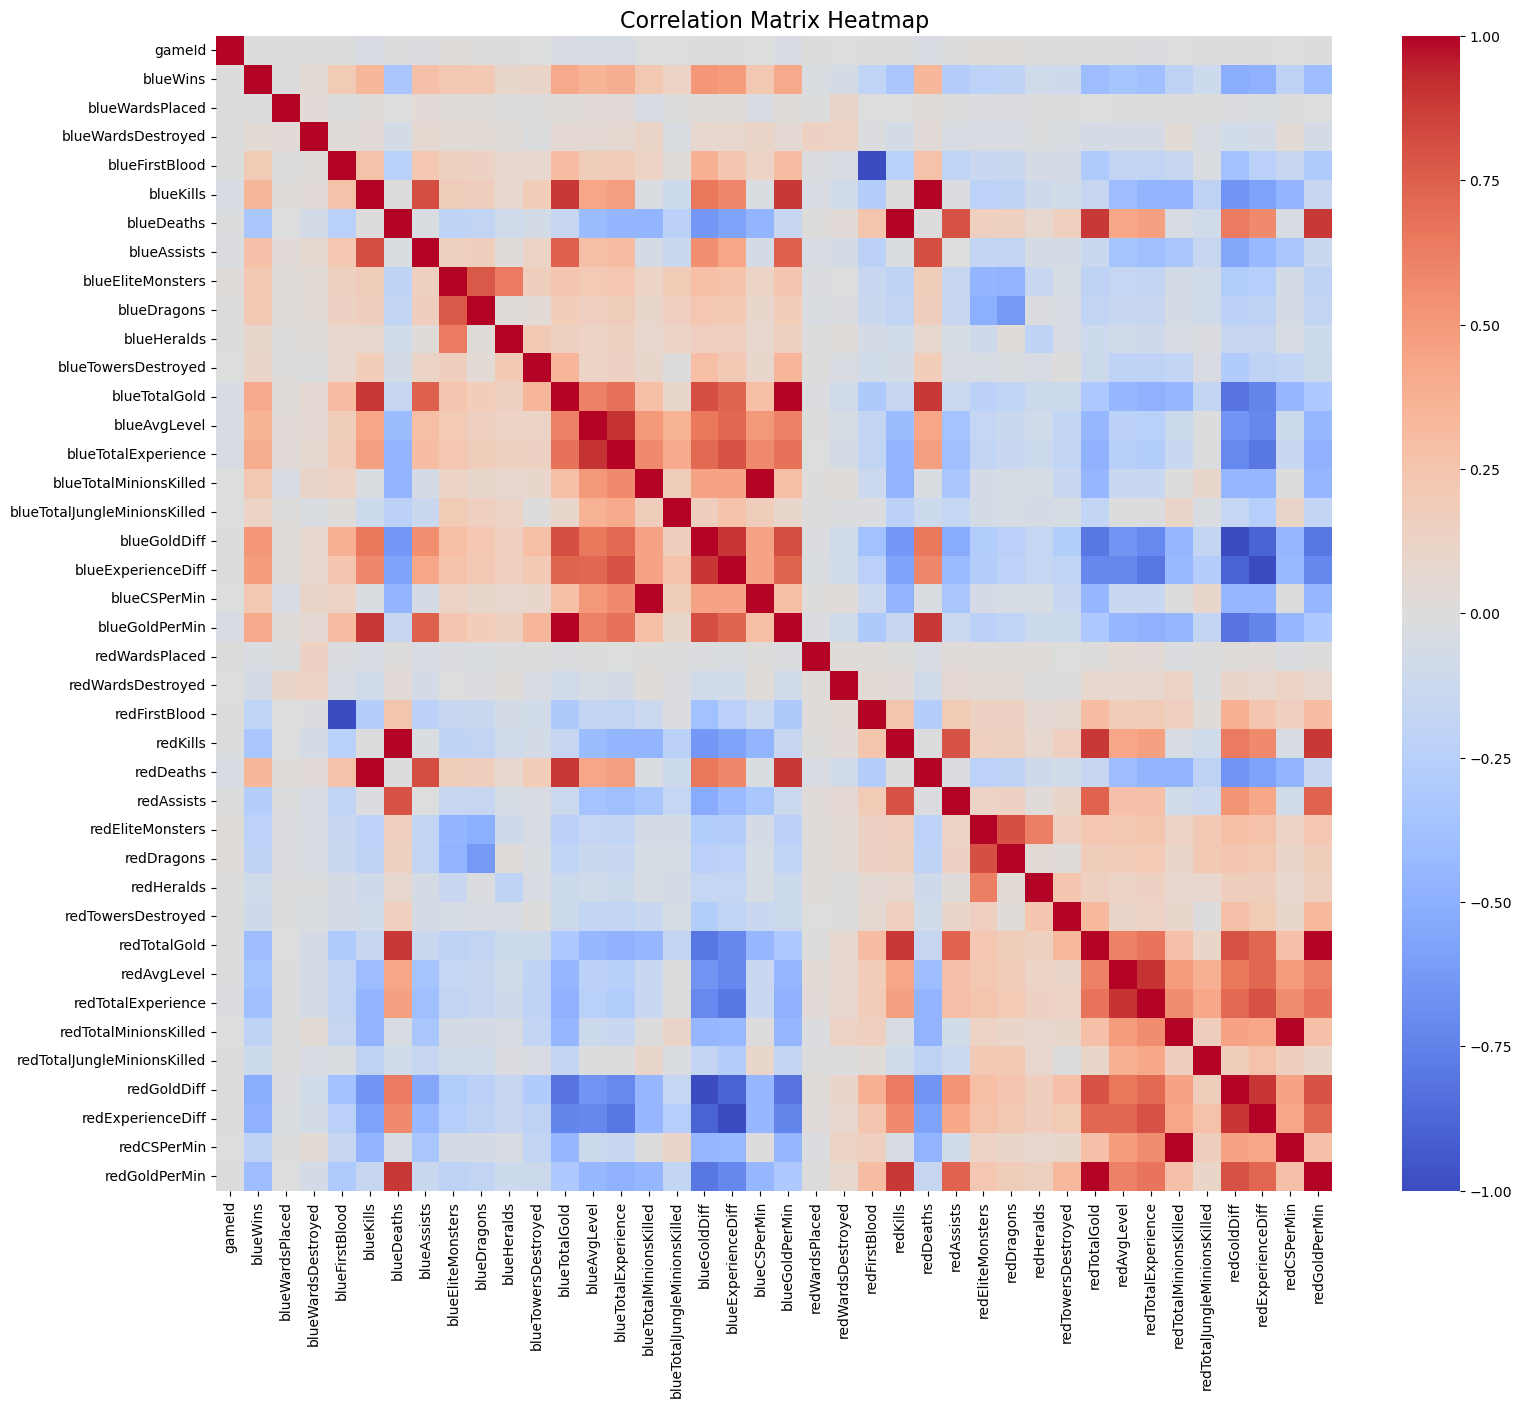

In [15]:
# Heatmap for Feature Correlations
plt.figure(figsize=(18, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

Okay, my eyes hurt. Let's consider displaying only those with score of +- 0.3.
>

In [16]:
def find_correlations(data, target, positive_threshold=0.5, negative_threshold=-0.5):
    '''
    data : insert your df here
    target : insert your target feature, string
    positive threshold : default 0.5
    negative threshold : default -0.5
    '''
    correlations = data.corr()[target]
    significant_correlations = correlations[(correlations > positive_threshold) | (correlations < negative_threshold)]
    return significant_correlations

In [17]:
# Features with +- 0.3 features
target = 'blueWins'
positive_threshold = 0.3 
negative_threshold = -0.3

significant_correlations = find_correlations(df, target, positive_threshold, negative_threshold)
print(significant_correlations)


blueWins               1.000000
blueKills              0.337358
blueDeaths            -0.339297
blueTotalGold          0.417213
blueAvgLevel           0.357820
blueTotalExperience    0.396141
blueGoldDiff           0.511119
blueExperienceDiff     0.489558
blueGoldPerMin         0.417213
redKills              -0.339297
redDeaths              0.337358
redTotalGold          -0.411396
redAvgLevel           -0.352127
redTotalExperience    -0.387588
redGoldDiff           -0.511119
redExperienceDiff     -0.489558
redGoldPerMin         -0.411396
Name: blueWins, dtype: float64


In [18]:
# Display every features corr with blueWins, explude id feature
temp_corr = df.corr().abs()['blueWins'][1:]

temp_corr.sort_values(ascending=False)

blueWins                        1.000000
redGoldDiff                     0.511119
blueGoldDiff                    0.511119
redExperienceDiff               0.489558
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
redTotalGold                    0.411396
redGoldPerMin                   0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
blueDeaths                      0.339297
redKills                        0.339297
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redTotalMinionsK

## 6. Explore target relations with other features.

In [19]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [20]:
df.groupby('blueWins').mean()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,
0,4.500057e+09,22.286725,2.728834,0.404122,5.170135,7.131138,5.522732,0.411396,0.259446,0.151950,...,0.065468,17101.177814,7.032613,18425.370580,221.989089,52.423924,1237.066680,971.898969,22.198909,1710.117781
1,4.500111e+09,22.289858,2.921298,0.605882,7.201623,5.140365,7.771805,0.689047,0.464909,0.224138,...,0.020487,15874.545842,6.817606,17496.303448,212.691481,50.197972,-1270.718053,-908.274442,21.269148,1587.454584


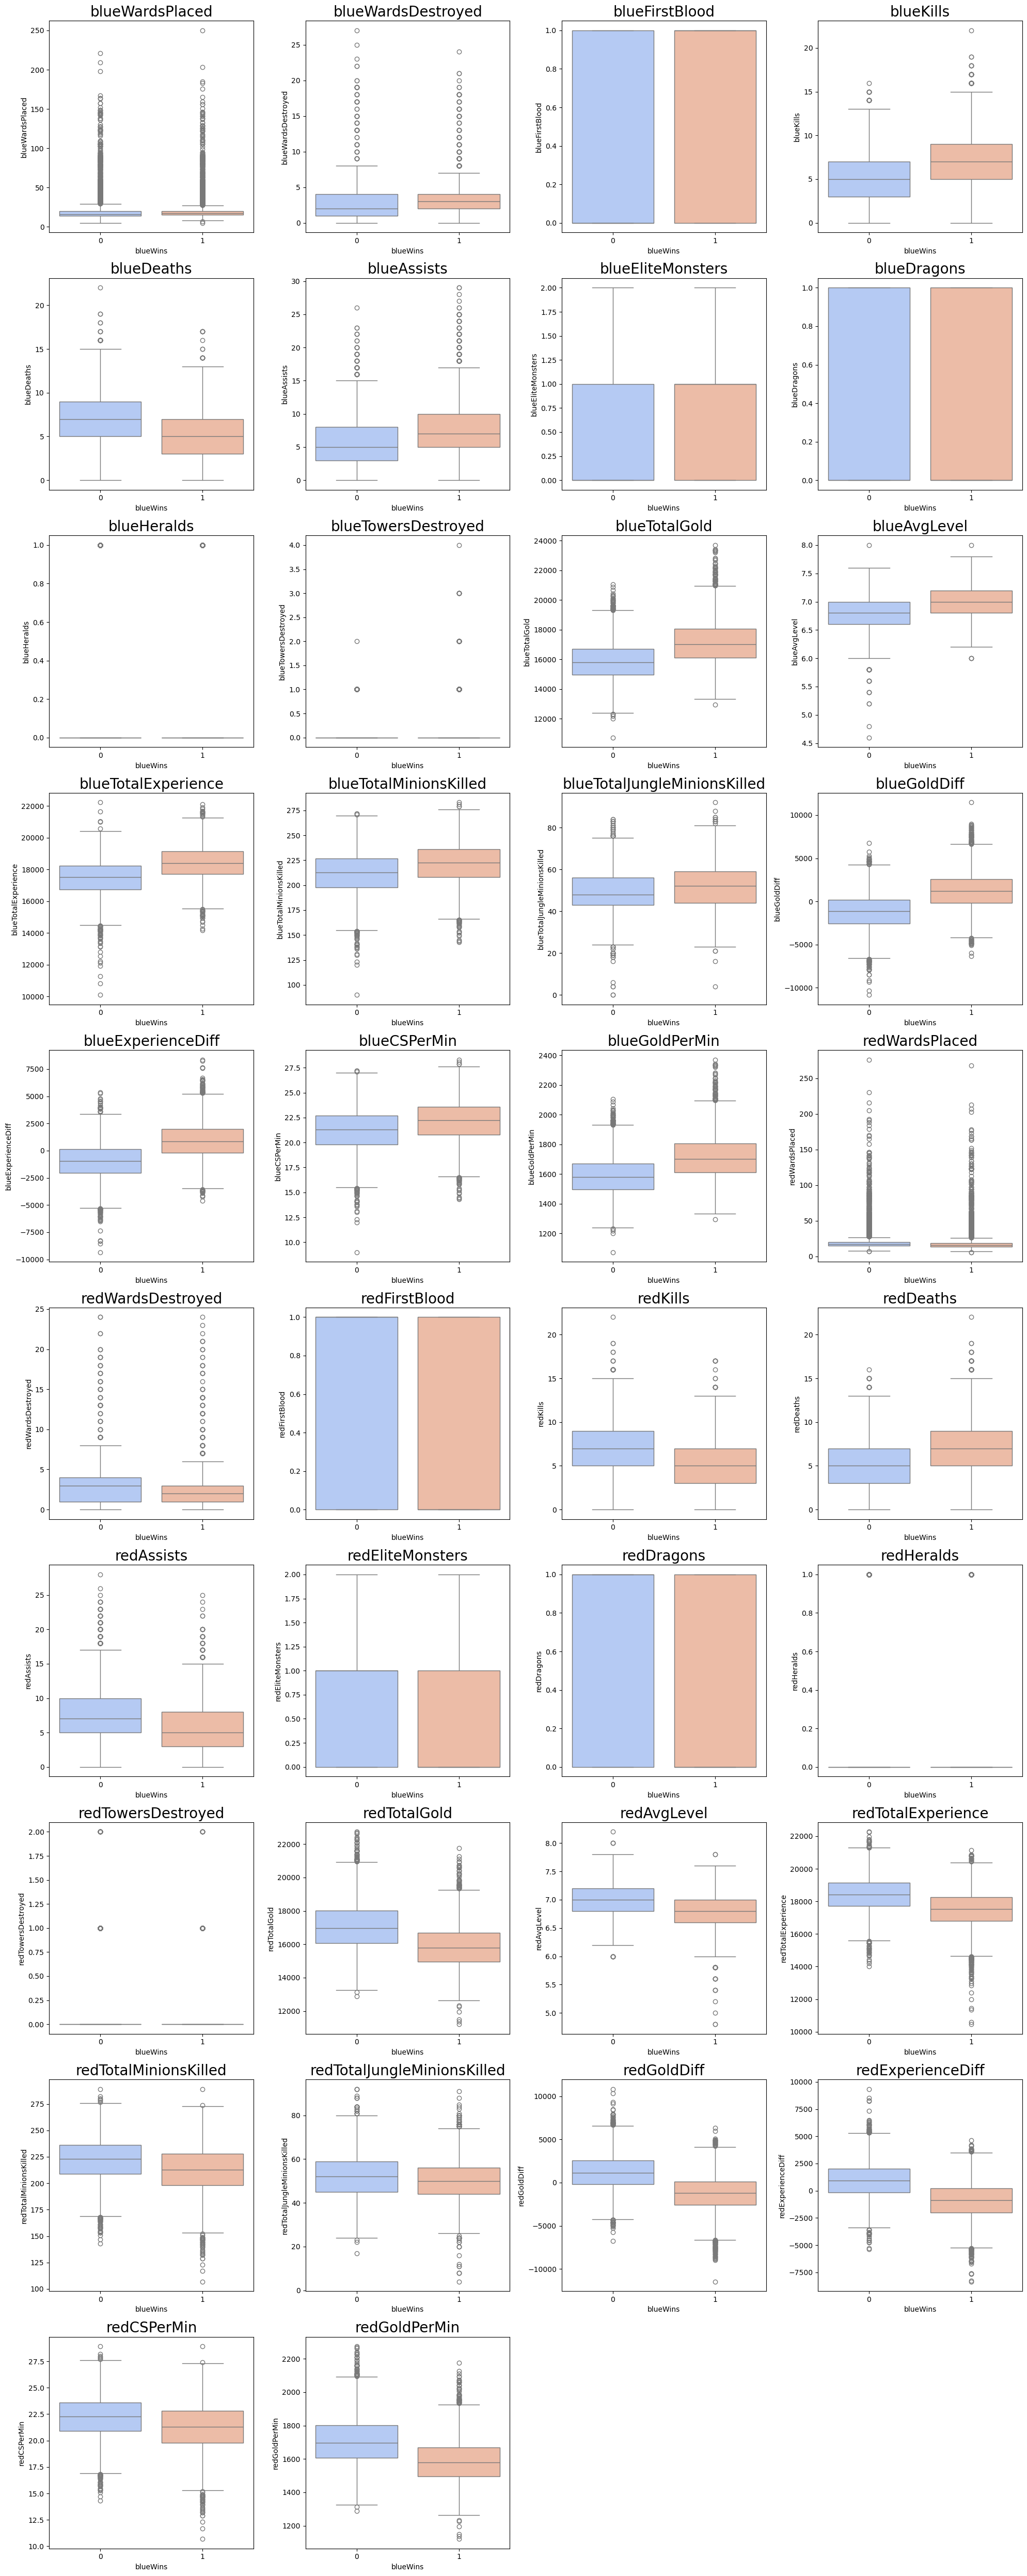

In [21]:
# target blueWins
fig = plt.figure(figsize=(20, 50))
j = 1

for i in df.columns[2:]:
    plt.subplot(10, 4, j)
    sns.boxplot(x=df['blueWins'], y=df[i], palette='coolwarm')
    plt.title(f'{i}', fontsize=20)
    j += 1
plt.tight_layout()
plt.show()

`blueKills`: Higher kills are associated with wins.

`blueTotalGold`: Wins correlate with higher gold accumulation.

`blueAvgLevel`: Higher team level seems to indicate a greater chance of winning.

`blueDragons` and `blueHeralds`: These objectives are slightly more common in winning games.

Outliers are present in most features. But the `blue/redWardsPlaced` and `blue/redWardsDestroyed` features have the highest amount.
>
Let's see the ecdf of each of them after this

In [22]:
# but first. let's check some more
wards_placed_threshold = 100
wards_destroyed_threshold = 15

# Filter the DataFrame for outliers
extreme_outliers = df[(df['blueWardsPlaced'] > wards_placed_threshold) |
                      (df['redWardsPlaced'] > wards_placed_threshold) |
                      (df['blueWardsDestroyed'] > wards_destroyed_threshold) |
                      (df['redWardsDestroyed'] > wards_destroyed_threshold)]

extreme_outliers


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,16192,7.0,18083,242,48,470,187,24.2,1619.2
28,4519148589,0,105,5,1,8,6,13,1,1,...,0,16154,6.8,17849,223,40,-1320,413,22.3,1615.4
63,4516919746,1,122,3,1,9,1,10,2,1,...,0,14336,6.4,16737,233,40,-3933,-2922,23.3,1433.6
117,4513430767,1,14,1,1,6,4,12,1,1,...,0,15564,7.0,18271,217,48,-625,534,21.7,1556.4
121,4522505411,0,14,16,0,3,9,2,0,0,...,0,18439,7.6,20356,255,51,3900,3550,25.5,1843.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9784,4525583733,1,20,21,1,4,4,7,0,0,...,0,14605,6.4,15824,204,36,-977,-134,20.4,1460.5
9791,4525326999,1,40,3,1,3,3,3,1,1,...,0,14879,6.8,17537,224,44,-98,-161,22.4,1487.9
9847,4527648336,0,38,6,1,9,5,7,0,0,...,0,16047,7.0,17842,228,48,-893,-256,22.8,1604.7
9859,4527696871,1,36,2,1,9,4,11,1,1,...,0,15976,7.0,18022,210,63,-2527,-1695,21.0,1597.6


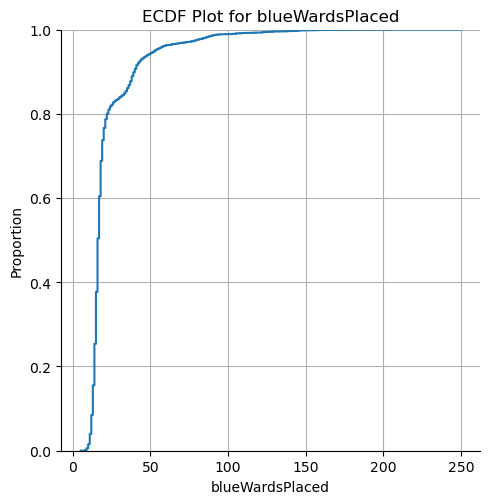

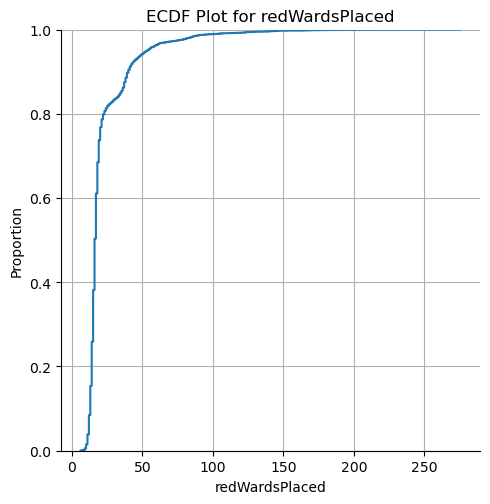

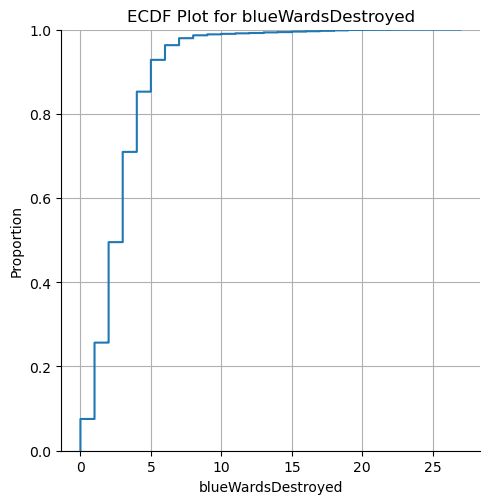

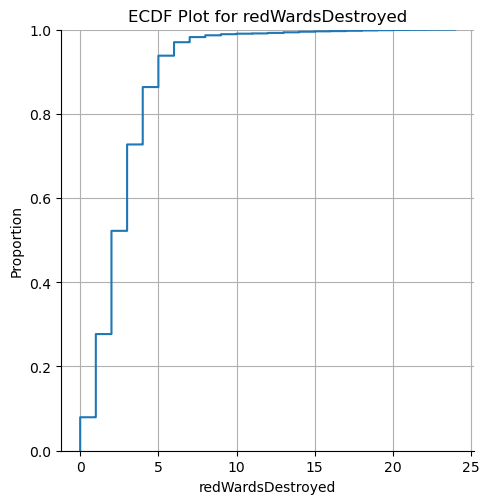

In [23]:
ecdf_col = ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed']

for col in ecdf_col:
    sns.displot(df[col], kind="ecdf")
    plt.grid(True)
    plt.title(f'ECDF Plot for {col}')

plt.show()


Most data points are concentrated below 50-70 `wardsPlaced` on both side.

The tail of the ECDF (values >100) represents a very small number of gmes in the dataste, likely outliers

Although it's possible to actually place hundreds of wards within 10 minutes, doing that would require anyone to stay in in the base for the better part of the game. And we're only taking the first 10 minutes into account.

by building the support item that grants wards placement, players gain charges for wards placement. And this resets when players are in the base.

So to achieve that much of craze, I say these games are unserious.

Regardless. They are outliers that would impact prediction's capabilities.

Simply capping them would only cap the 5% highest numbers in those columns. Which also will leave r/b WardsPlaced values between 100 -200 alone.

---

https://mobalytics.gg/blog/league-of-legends-vision-warding-strategy/ 

# v. Feature Engineering

In [24]:
# x y train test split here
# change here, df_test or filtered_df
X = df.drop(columns=['blueWins', 'gameId'])
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [25]:
X_test.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [26]:
print(sum(y_train == 0))
print(sum(y_train == 1))
print()
print(sum(y_test == 0))
print(sum(y_test == 1))

3985
3918

964
1012


In [27]:
X_train[X_train['blueWardsPlaced'] >= 150]

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
6562,163,1,0,4,4,4,1,1,0,0,...,0,16872,7.2,18686,243,56,1233,-270,24.3,1687.2
8052,152,4,0,7,6,6,1,1,0,0,...,0,16634,6.8,17470,203,52,26,-989,20.3,1663.4
7623,151,3,0,5,4,2,2,1,1,0,...,0,15835,6.8,17499,228,51,284,260,22.8,1583.5
5552,183,2,0,8,11,8,0,0,0,0,...,0,17490,6.4,16769,186,48,590,-527,18.6,1749.0
8206,250,4,1,12,10,12,1,0,1,0,...,0,16637,6.8,17750,174,56,-3067,-503,17.4,1663.7
1257,156,0,1,10,6,15,2,1,1,1,...,0,16520,6.8,17915,192,47,-3663,-2748,19.2,1652.0
6116,209,1,1,5,9,4,1,1,0,0,...,0,17381,7.4,19666,202,52,1678,2431,20.2,1738.1
2326,164,3,0,4,11,5,0,0,0,0,...,0,17912,7.0,17680,174,56,2539,1447,17.4,1791.2
6983,167,1,1,5,8,6,0,0,0,0,...,0,17736,7.4,19579,209,64,1729,2105,20.9,1773.6
6401,203,2,1,6,7,12,1,1,0,0,...,0,16646,6.8,17774,210,48,-751,-615,21.0,1664.6


## 1. Outliers

In [28]:
# to cap with winso
nums_to_cap = ['blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed']

In [29]:
for feature in nums_to_cap:
    X_train[feature] = winsorize(X_train[feature], limits=(0.01, 0.01))

In [30]:
X_train[X_train['blueWardsPlaced'] >= 150]

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin


In [31]:
print(X_train.shape)
print(y_train.shape)

(7903, 38)
(7903,)


Should we also apply the bound to X_test?

If the test set represents real-world data and we want to evaluate how well the model handles outliers naturally, we should not modify the test set.

If our goal is to test the robustness of the model to unseen data with potential outliers, leaving the test set untouched is a better choice.

---
NOTE

In some high elo games, and international championship games, placing wards is the game. In one whole game, people can ward over 200 wards. If we take into account that whole game usually last from 20 - 30 minutes, then that would be around 80 -100 wards per 10 minutes..

https://www.reddit.com/r/summonerschool/comments/6jzyr3/a_little_insight_on_how_many_control_wards_are/ 

## 2. Features Selection

In [32]:
X.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [33]:
# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Find correlations greater than 0.9 (high multicollinearity)
threshold = 0.89
high_corr_pairs = (correlation_matrix
                   .abs()  # Get absolute correlations
                   .where(lambda x: x > threshold)  # Filter high correlations
                   .stack()  # Convert to a series
                   .reset_index())

# Drop duplicates and self-correlations
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

In [34]:
high_corr_pairs

,Feature1,Feature2,Correlation
3,blueFirstBlood,redFirstBlood,1.000000
5,blueKills,redDeaths,1.000000
7,blueDeaths,redKills,1.000000
14,blueTotalGold,blueGoldPerMin,1.000000
16,blueAvgLevel,blueTotalExperience,0.902570
17,blueTotalExperience,blueAvgLevel,0.902570
20,blueTotalMinionsKilled,blueCSPerMin,1.000000
23,blueGoldDiff,blueExperienceDiff,0.895462
24,blueGoldDiff,redGoldDiff,1.000000
25,blueGoldDiff,redExperienceDiff,0.895462


In [35]:
# List of redundant features to drop
features_to_drop = [
    'redFirstBlood', 'redDeaths', 'redKills', 'blueGoldPerMin',
    'blueAvgLevel', 'blueCSPerMin', 'redGoldDiff', 'redExperienceDiff',
    'redGoldPerMin', 'redAvgLevel', 'redCSPerMin'
]

In [36]:
# let's drop them from both train and test set
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

In [37]:
# Define the numeric transformer pipeline with PCA
pca_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # if there's any missing. But a bit redundant here since no missing vals were detected.
    ('scaler', StandardScaler()),
])

# Combine the numeric transformer into a ColumnTransformer
pca_preprocessor = ColumnTransformer(
    transformers=[
        ('num', pca_numeric_transformer, X_train.columns)
    ]
)

In [38]:
X_train.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')

# vi. Model Definition

In [39]:
# pipelines for different models

logreg_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

knn_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', KNeighborsClassifier())
])

svm_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', SVC(class_weight='balanced', random_state=23))
])

decision_tree_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=23))
])

random_forest_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=23))
])

boosting_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=23))
])

xgboost_pca_pipeline = Pipeline(steps=[
    ('preprocessor', pca_preprocessor),  # Same preprocessor as before
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# vii Model Training

In [40]:
# Train and evaluate each model with PCA-based pipeline

models_pca = {
    "Logistic Regression" : logreg_pca_pipeline,
    "KNN": knn_pca_pipeline,
    "SVM": svm_pca_pipeline,
    "Decision Tree": decision_tree_pca_pipeline,
    "Random Forest": random_forest_pca_pipeline,
    "Gradient Boosting": boosting_pca_pipeline,
    "XGBoost" : xgboost_pca_pipeline
}

# Evaluate all models
results = []
for name, model in models_pca.items():
    # Fit the pipeline on training data
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred_pca = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_pca)
    results.append((name, accuracy, classification_report(y_test, y_pred_pca, output_dict=True)))

In [41]:
# Check class distribution of 0 and 1
print(sum(y_test == 0))
print(sum(y_test == 1))

964
1012


In [42]:
# Summarize results for Accuracy only
accuracy_results = pd.DataFrame(
    [(name, accuracy) for name, accuracy, _ in results],
    columns=['Model', 'Accuracy']
)

# Display the accuracy results
accuracy_results

,Model,Accuracy
0,Logistic Regression,0.741903
1,KNN,0.681680
2,SVM,0.729757
3,Decision Tree,0.636134
4,Random Forest,0.735324
5,Gradient Boosting,0.732794
6,XGBoost,0.709008


Based on problem statement, we want to be able to predict either 1 or 0. And both are equally important

Logistic Regression seems to be the winner here.

Let's use that for model evaluation

# viii. Model Evaluation

## 1. Classification Report

In [43]:
# Predict on test set
y_pred = logreg_pca_pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       964
           1       0.75      0.74      0.74      1012

    accuracy                           0.74      1976
   macro avg       0.74      0.74      0.74      1976
weighted avg       0.74      0.74      0.74      1976

Accuracy: 0.7419
Precision: 0.7540
Recall: 0.7362
F1 Score: 0.7450


The model performs consistently across precision, recall, and F1-score for both classes.

In [44]:
# def plot_cm(cm):
#     ax = sns.heatmap(cm, annot=True, fmt='g')
#     ax.set_title('Confusion matrix')
#     ax.set_xlabel('\nPredicted Values')
#     ax.set_ylabel('Actual Values')
#     plt.show()

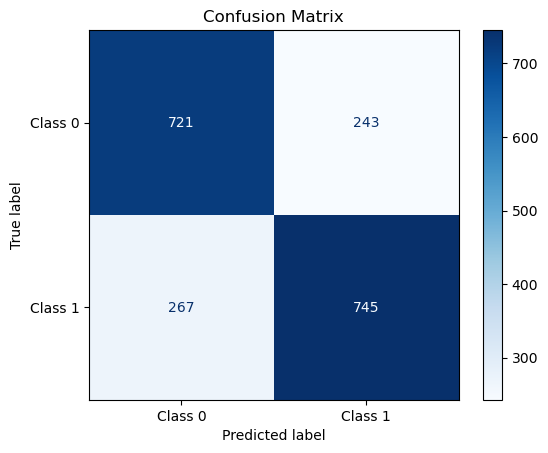

In [45]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Good balance between the classes, though false positives and false negatives are still present.

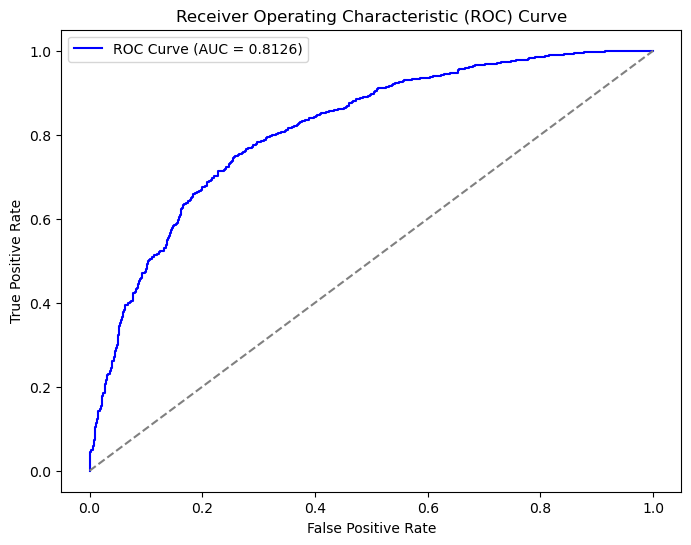

In [46]:
# Get predicted probabilities
y_pred_proba = logreg_pca_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC = 0.8126
AUC > 0.8 means the model is good at discriminating between the two classes.

source : https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=AREA%20UNDER%20THE%20ROC%20CURVE,-AUC%20is%20an&text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding.

In [47]:
# Cross-validation
cv_scores = cross_val_score(logreg_pca_pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.73279352 0.72925101 0.72773279 0.74089069 0.72708861]
Mean Accuracy: 0.7316
Standard Deviation: 0.0051


The model generalizes well across different folds with low variation, which is a great sign of robustness.

## 2. Hyperparameter

In [48]:
param_grids = {
    "Logistic Regression" : {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear'],
        'classifier__max_iter': [100, 200] 
        }
}

# Map model names to pipelines
models_pca = {
    "Logistic Regression": logreg_pca_pipeline
}

In [49]:
# Run GridSearchCV for each model
best_params = {}
best_scores = {}

for name, model in models_pca.items():
    print(f"Optimizing {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_

# Summarize the results
optimization_results = pd.DataFrame(
    [(name, best_scores[name], best_params[name]) for name in models_pca.keys()],
    columns=['Model', 'Best CV Accuracy', 'Best Parameters']
)

Optimizing Logistic Regression...


In [50]:
# to display the full length of a column
pd.set_option('display.max_colwidth', None)

In [51]:
optimization_results

,Model,Best CV Accuracy,Best Parameters
0,Logistic Regression,0.732255,"{'classifier__C': 100, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}"


In [52]:
# Define the best models with tuned hyperparameters
best_models = {
    "Logistic Regression" : Pipeline(steps=[
    ('preprocessor', pca_preprocessor),
    ('classifier', LogisticRegression(C=100, solver='lbfgs', class_weight='balanced', max_iter=100)) # rand
    ])
}

# Evaluate each best model and generate ther confusion matrix
evaluation_results = []
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    # Fit the best model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Generate confusion matrix
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    evaluation_results.append((name, accuracy))


Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.7414

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       964
           1       0.75      0.74      0.74      1012

    accuracy                           0.74      1976
   macro avg       0.74      0.74      0.74      1976
weighted avg       0.74      0.74      0.74      1976

--------------------------------------------------


Logistic Regression seems to ace here.

In [53]:
# assign best model. In this case, logistic regression
best_model_final = best_models["Logistic Regression"]

In [54]:
best_model_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueTotalExperie...
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=100, class_weight='balanced'))])

## 3. Coefficient and Intercept

In [55]:
# Final trained modl
logreg_model = best_model_final.named_steps['classifier']

# extract features names
feature_names = best_model_final.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients and intercept
coefficients = logreg_model.coef_[0]  # Logistic Regression stores coefficients in a 2D array
intercept = logreg_model.intercept_[0]

# Combine feature names with coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display results
print("Intercept:", intercept)

Intercept: -0.0009623335404299466


In [56]:
coefficients_df

,Feature,Coefficient
14,num__blueGoldDiff,0.602176
10,num__blueTotalGold,0.509697
15,num__blueExperienceDiff,0.194879
4,num__blueDeaths,0.132837
11,num__blueTotalExperience,0.123046
7,num__blueDragons,0.116652
25,num__redTotalMinionsKilled,0.104166
26,num__redTotalJungleMinionsKilled,0.084460
22,num__redTowersDestroyed,0.082363
6,num__blueEliteMonsters,0.071752


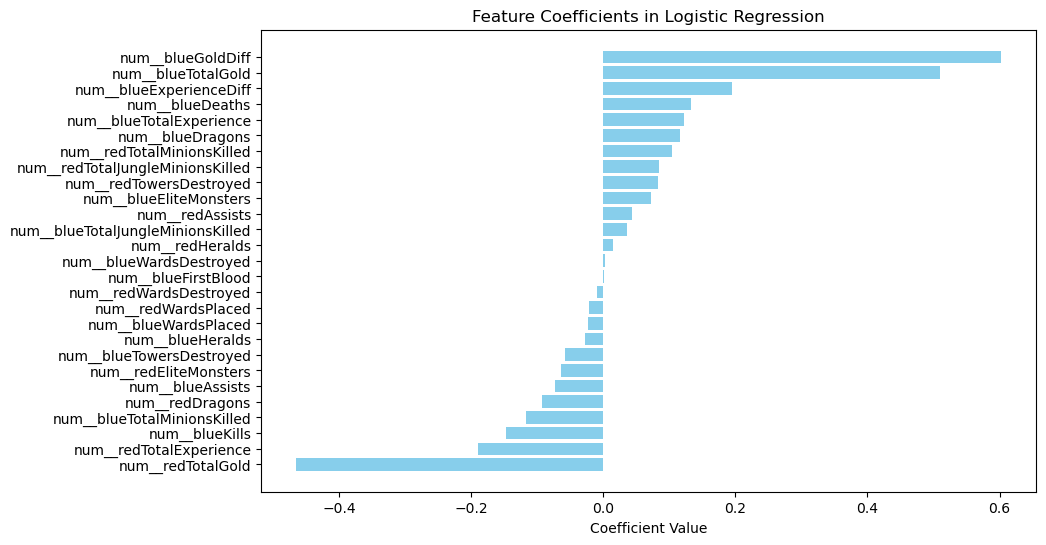

In [57]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

Gold Difference (num__blueGoldDiff) is the strongest predictor of winning.

Controlling gold economy is critical for success.

Red Team’s Success Metrics:

Total gold, total experience, and securing dragons for the red team negatively affect the blue team’s winning chances.

Kills and Minions:

Surprisingly, blueKills and minions killed alone have a small negative or negligible effect on winning. This emphasize the importance of objectives over raw kills or farming.

## 4. Linear Assumption Check for Logistic Regression

In [58]:
def check_linear_assumption(feature, target):
    # Bin the feature into intervals
    df['feature_bin'] = pd.qcut(df[feature], q=10, duplicates='drop')

    # Calculate mean of feature and log-odds of the target
    bin_summary = df.groupby('feature_bin')[target].mean().reset_index()
    bin_summary['log_odds'] = np.log(bin_summary[target] / (1 - bin_summary[target]))

    # Plot feature mean vs log-odds
    plt.figure(figsize=(8, 5))
    plt.plot(bin_summary['feature_bin'].astype(str), bin_summary['log_odds'], marker='o', linestyle='--')
    plt.title(f'Log-Odds vs {feature}')
    plt.xlabel(f'{feature} (Binned)')
    plt.ylabel('Log-Odds')
    plt.xticks(rotation=45)
    plt.show()

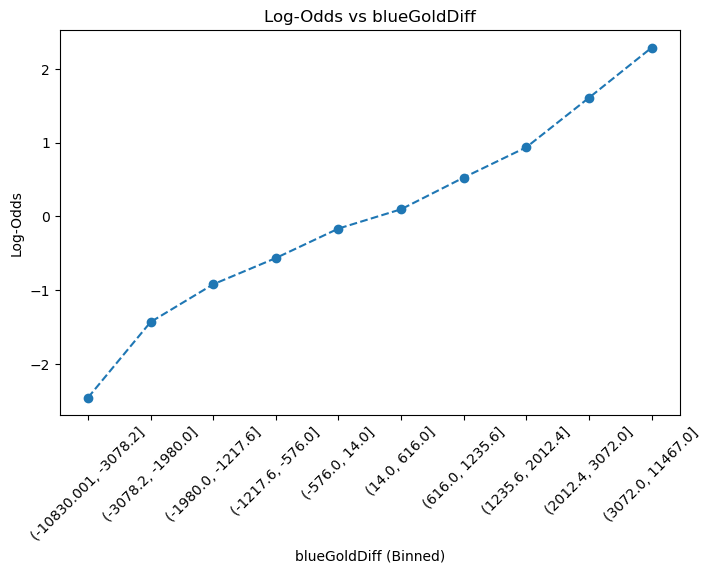

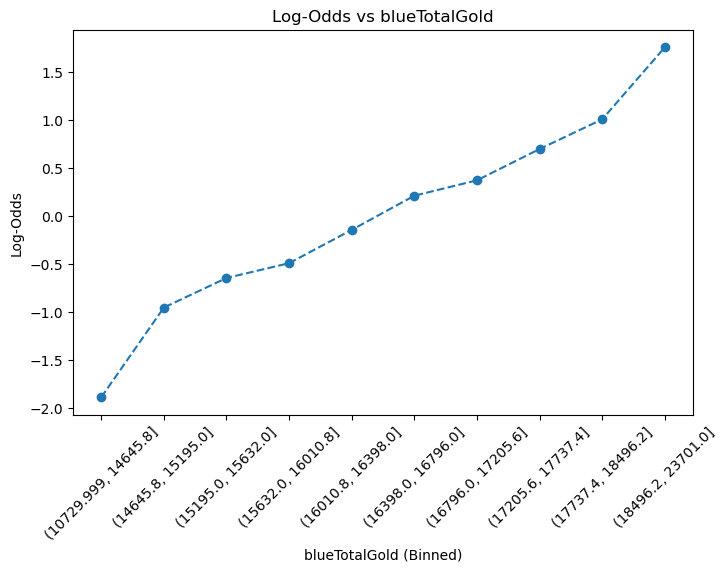

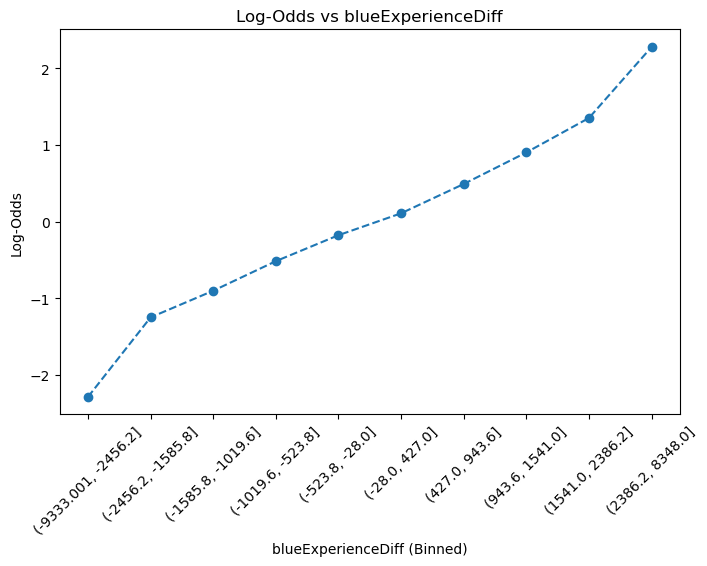

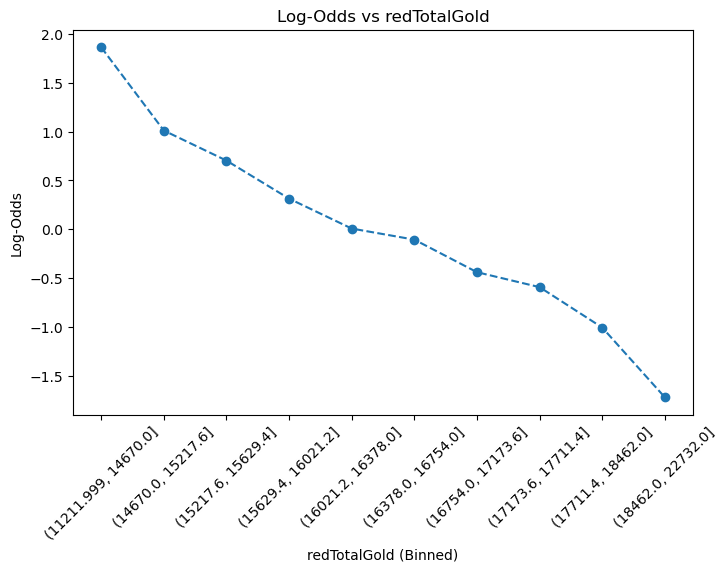

In [59]:
# Example usage
check_linear_assumption('blueGoldDiff', 'blueWins')
check_linear_assumption('blueTotalGold', 'blueWins')
check_linear_assumption('blueExperienceDiff', 'blueWins')
check_linear_assumption('redTotalGold', 'blueWins')

`blueGoldDiff`:

Shows a strong positive linear trend with log-odds, confirming that higher `blueGoldDiff` increases the likelihood of winning.

`blueTotalGold`:

Similarly follows a linear pattern, indicating that total gold accumulation directly improves the probability of winning.

`blueExperienceDiff`:

Demonstrates a linear relationship, supporting its importance in predicting match outcomes.

`redTotalGold`:

Exhibits a clear negative linear relationship, meaning that higher red team gold reduces the blue team’s chances of winning.

---
Key takeaways:

For key numerical features like `blueGoldDiff`, `blueTotalGold`, and `blueExperienceDiff`, the linear assumption holds well.

This validates the use of Logistic Regression for this problem since the relationships align with the linear assumption.

# ix. Model Saving

In [60]:
model_filename = "best_model_milestone2.pkl"
with open(model_filename, 'wb') as file_0:
    pickle.dump(best_model_final, file_0)

# x. Model Inference (another notebook)

# xi. Conclusion

## 1. Concluding...

That we have finished the model that can predict a win or a lost with overall accuracy score of 74%.

Variables that contribute to the winning, statistically, are as follow:

1. Gold Difference with enemy team :
    - The game is designed to reward fed players, especially early on, allowing them to dominate the game and winning it early.
    - Players should focus on generating golds more than anything as it allowes them to buy items, further scaling their performance.
    - When you're on the losing side of this variable, consider line swapping with other players, or farm when the time allows it. But in high elo games, players rarely have the opportunity to farm. With other objectives start poping up after 10 minutes, they will have no choice but to compete. 

    - HOWEVER. There are many variables that contribute to a game. From skill issues, technical ones, how easily a player is aggravated from enemies' taunts and outplays. 
2. Experience Points:
    - Fed players tend to stay in a lane/jungle longer, thus allowing them to gain more experience points from minnion kills. Itterating the previous point, the game rewards fed players, however as a game progress longer, other players may make a comeback. How? Respawn times progressively get longer as the game progress. If you can manage to isolate and take down one player at a time, you can almost certainly make a comeback.
3. Numbers of Wards placed:
    - In the last couple patch before, the dev implemented scores system that can, somewhat objectively, score players performance. One of the biggest factor is visions. Quantities and placement seems to affect your score by lots. This model proves it.

    - HOWEVER. Be mindful of the placement and how much player should spend on it.
4. Which team managed to obtain the Herald.
    - Owning a Herald will almost certainly score you a turret, providing extra golds to the whole team who manage to destroy the enemy turret.

---
Below is to show which variables (features) that contribute the most to winning the game.

## 2. Strength, Weakness, and Future improvement

Strength :
1. Somewhat strong predictive performance
	- The model achieves 74.14% accuracy on the test set.
	- Balanced performance across precision, recall, and F1-score for both classes (class 0 and class 1).

2. Robustness to Overfitting:
	- The model maintains a consistent performance across cross-validation (CV accuracy: 73.23%) and test evaluation, which shows its ability to generalize well.

3. Efficient and Fast:
	- Training and inference are computationally inexpensive compared to complex models like Random Forest or XGBoost.

Weakness:

1. Linear Assumption:

	- Logistic Regression assumes a linear relationship between input features and the log-odds of the target variable.
	- If the relationship is non-linear, models like Random Forest or XGBoost might perform better.

2. Limited Flexibility:

	- Logistic Regression does not naturally capture feature interactions. More complex models like Decision Trees or Boosting algorithms can model these interactions effectively.

3. Sensitivity to Outliers:
	- Logistic Regression can be influenced by outliers, which may distort coefficients and predictions. Which we have handled it with winsow.

4. Feature Scaling Dependency:
	- Logistic Regression requires standardized (scaled) features for optimal performance, which adds a preprocessing step.

Future Improvement:

1. Error Analysis: Investigate false positives and false negatives to see if there’s a pattern that could be improved (e.g., using non-linear models).

2. Feature Importance: Use the model’s coefficients to understand which features contribute most to predictions.

3. Collect more data or update. Since this dataset is from an old patch, the devs had not yet impemented Scoring system in the game. As per this notebook was written, the year is 2024. They now have more robust features that can help people make better model. Example : vision score, etc.

## 3. Conceptuals

### a. Bagging

Bagging, abbreviation of Bootstrap Aggregating, was designed to deal with high variance and overfitting issues in machine learning models.

note : variance = the changes in the model when using different portions of the training data set. The degree to which a model's predictions change when different parts of the training data are used.

Relying on a single model can often be unstable because small changes in the data can lead to big changes in predictions. Bagging can bridge the gap by combining multiple models to get a likely better and robust result.

How it usually works:
1. Bootstrap sampling
	- Take the original dataset and create multiple datasets by sampling with replacement.

2. Train Separate Models
	- Train a model on each of those bootstrapped datasets.

3. Aggregate Predictions:
	- For classification : Use majority voting (most common prediction)
	- For regression : averaging all predictions.

Key takeaways :

Bagging reduces variance by combining predictions.

Example : Random Forest is a bagging-based algorithm that trains multiple Decision Trees.

Source : https://www.ibm.com/think/topics/bagging#:~:text=Bagging%2C%20also%20known%20as%20bootstrap,be%20chosen%20more%20than%20once. 


### b. Random Forest and Boosting

Random Forest (Bagging):

Builds multiple Decision Trees independently using bootstrapped samples of the data.
Combines predictions via voting (classification) or averaging (regression).

	- Training Style:
		* Parallel: All models are trained at the same time.
		* Goal: Reduce variance (stability is the focus).
		* Pros: Works well out of the box, fast, and handles noise in data.
		* Cons: Doesn’t necessarily minimize bias (errors that come from underfitting).
>

Boosting (e.g., Gradient Boosting): 

Models are trained sequentially, where each new model focuses on fixing the errors made by the previous model. Gives more weight to “hard-to-predict” data points.

	- Training Style: 
		* Sequential: Each model builds on top of the previous one.
		* Goal: Reduce bias (focus on improving weak spots).
		* Pros: More accurate for complex datasets, especially when tuned properly.
		* Cons: Slower to train and prone to overfitting if not regularized.

Key Takeaways:

Random Forest = Parallel, reduces variance, stable.

Boosting = Sequential, reduces bias, focuses on mistakes.


source = https://www.geeksforgeeks.org/gradient-boosting-vs-random-forest/

### c. Cross Validations

Cross-validation is a technique to evaluate a model by splitting the dataset into k folds (example, 5 or 10 folds).
It’s like training and testing the model multiple times on different parts of the data.

How It Works:

Split the dataset into k equal folds (say, 5).
Train the model on k-1 folds and test it on the remaining fold.
Repeat this k times, using a different fold as the test set each time.
Average the results to get the model’s final performance.

Why Use It:

Avoids overfitting by testing the model on multiple subsets of the data.
Gives a better estimate of how the model will perform on unseen data.

Types of Cross-Validation:

- K-Fold: The standard method (k = 5 or 10).
- Stratified K-Fold: Ensures class balance in each fold (important for imbalanced data).
- Leave-One-Out (LOOCV): Uses one sample as the test set, the rest for training.
- Time Series Split: Maintains the order of data for time-based problems.

source : https://www.geeksforgeeks.org/cross-validation-machine-learning/